T-test Results: t-statistic = 3.9964, p-value = 0.0001
Conclusion: There is a significant difference in the median value of houses bounded by the Charles River.


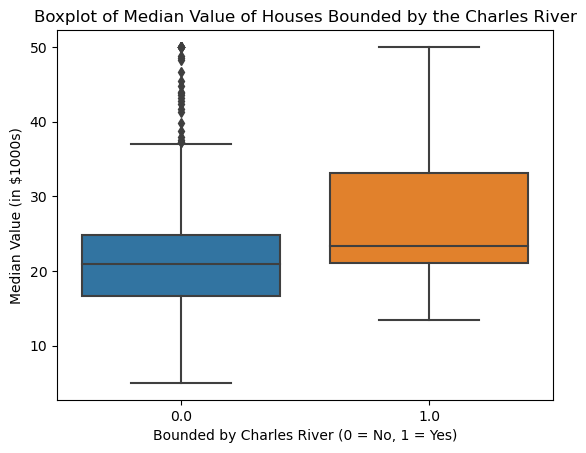

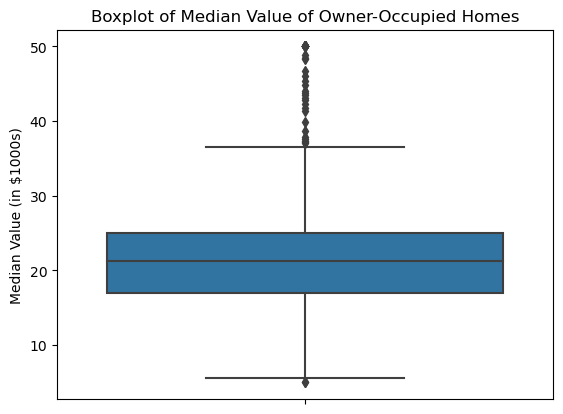

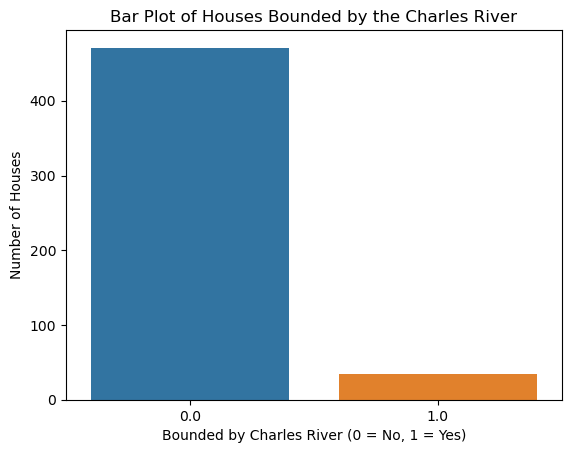

In [1]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('boston_housing (1).csv')

# Null and Alternative Hypotheses
# H0: There is no significant difference in the median value of houses bounded by the Charles River (CHAS=1) and those that are not (CHAS=0).
# H1: There is a significant difference in the median value of houses bounded by the Charles River (CHAS=1) and those that are not (CHAS=0).

# Perform T-test for difference in MEDV based on CHAS
t_stat, p_value = stats.ttest_ind(df[df['CHAS'] == 1]['MEDV'],
                                  df[df['CHAS'] == 0]['MEDV'])

print(f"T-test Results: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

# Conclusion
if p_value < 0.05:
    print("Conclusion: There is a significant difference in the median value of houses bounded by the Charles River.")
else:
    print("Conclusion: There is no significant difference in the median value of houses bounded by the Charles River.")

# Boxplot to visualize the difference in median values
sns.boxplot(x='CHAS', y='MEDV', data=df)
plt.title('Boxplot of Median Value of Houses Bounded by the Charles River')
plt.xlabel('Bounded by Charles River (0 = No, 1 = Yes)')
plt.ylabel('Median Value (in $1000s)')
plt.show()

# Boxplot for the median value of owner-occupied homes (MEDV)
sns.boxplot(y=df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.ylabel('Median Value (in $1000s)')
plt.show()

# Bar plot for the Charles River variable (CHAS)
sns.countplot(x='CHAS', data=df)
plt.title('Bar Plot of Houses Bounded by the Charles River')
plt.xlabel('Bounded by Charles River (0 = No, 1 = Yes)')
plt.ylabel('Number of Houses')
plt.show()

# Explanation:
# - The first boxplot compares the distribution of median home values for houses that are near the Charles River (CHAS=1) and those that are not (CHAS=0).
# - The second boxplot shows the overall distribution of median home values (MEDV) across all houses.
# - The bar plot visualizes the count of houses that are and are not bounded by the Charles River, indicating how many observations fall into each category.


In [ ]:
# Null and Alternative Hypotheses
# H0: There is no significant difference in the median value of houses bounded by the Charles River (CHAS=1) and those that are not (CHAS=0).
# H1: There is a significant difference in the median value of houses bounded by the Charles River (CHAS=1) and those that are not (CHAS=0).
#Conclusion: Since the P value is less than 0.05 So the null hypothesis is rejected and the difference between the group observed.

In [ ]:
#EXPLANATION OF FIRST BOX PLOT:
This boxplot shows that houses bounded by the Charles River (CHAS=1) generally have higher median values compared
to those not bounded by the river (CHAS=0). The spread of values for houses near the river is larger, indicating more 
variability in prices. 
The T-test result confirms that the difference in median values between these two groups is statistically significant.
#EXPLANATION FOR SECOND BOX PLOT:
This boxplot shows the overall distribution of median values for owner-occupied homes,
with most homes having a median value around $20,000 to $25,000. The presence of outliers above $40,000 indicates 
some homes are significantly more expensive than the majority.
# EXPLANATION OF BAR CHART:
This bar plot shows the number of houses that are and are not bounded by the Charles River. 
The vast majority of houses are not bounded by the river (CHAS=0), with over 400 observations. 
Only a small fraction of houses are near the river (CHAS=1), 
highlighting the limited number of properties in proximity to the Charles River.

                    sum_sq     df         F        PR(>F)
C(AGE_GROUP)   5401.731883    2.0  36.40765  1.710501e-15
Residual      37314.563532  503.0       NaN           NaN
Conclusion: There is a significant difference in median values of houses across different age groups.


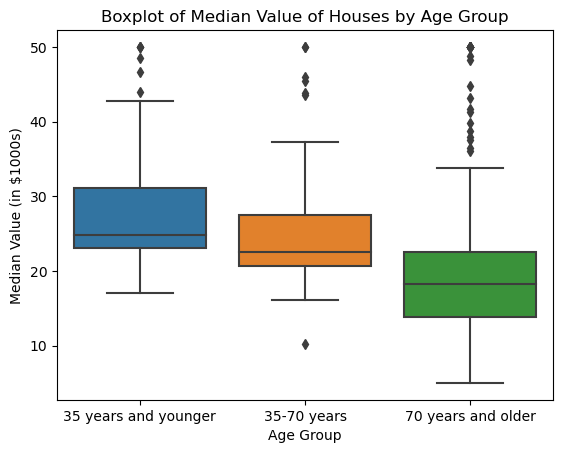

In [2]:
#2ANOVA: Is there a difference in median values of houses based on the proportion of owner-occupied units built before 1940?
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Null and Alternative Hypotheses
# H0: There is no significant difference in the median values of houses across different age groups.
# H1: There is a significant difference in the median values of houses across different age groups.

# Discretize AGE into three groups
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=[0, 35, 70, 100], labels=['35 years and younger', '35-70 years', '70 years and older'])

# Perform ANOVA
anova_result = ols('MEDV ~ C(AGE_GROUP)', data=df).fit()
anova_table = sm.stats.anova_lm(anova_result, typ=2)

print(anova_table)

# Conclusion
if anova_table['PR(>F)'][0] < 0.05:
    print("Conclusion: There is a significant difference in median values of houses across different age groups.")
else:
    print("Conclusion: There is no significant difference in median values of houses across different age groups.")

# Boxplot to visualize the difference in median values across age groups
sns.boxplot(x='AGE_GROUP', y='MEDV', data=df)
plt.title('Boxplot of Median Value of Houses by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value (in $1000s)')
plt.show()

# Explanation:
# The boxplot allows us to compare the distribution of median home values across different age groups.
# If the median values are different across these groups, it indicates that the age of the housing stock may influence house prices.
# The ANOVA test provides a statistical way to check if these differences are significant.


In [ ]:
# Null and Alternative Hypotheses
# H0: There is no significant difference in the median values of houses across different age groups.
# H1: There is a significant difference in the median values of houses across different age groups.
CONCLUSION:
The F-statistic (F) in the ANOVA table measures the ratio of the variance between the groups (AGE_GROUP)
to the variance within the groups. A higher F-statistic indicates a greater difference between group means.
The p-value (PR(>F)) is very small (1.71e-15), which is much less than the significance level (0.05). 
Therefore, we reject the null hypothesis and conclude that there is a significant difference in 
median house values across the different age groups.    

In [ ]:
EXPLANATION of BOX PLOT:
This boxplot compares the median values of houses across three different age groups: "35 years and younger,
" "35-70 years," and "70 years and older." 
The median home values are highest for the "35 years and younger" group, followed by the "35-70 years" group, and 
lowest for the "70 years and older" group. The spread of values (IQR) and the presence of outliers are different 
across these groups, indicating variability in house prices depending on the age of the housing stock. 
The boxplot shows that newer houses tend to have higher median values, with older houses having more outliers and 
lower median prices. This visual difference is statistically supported by the ANOVA test,
which shows a significant difference in median values across these age groups.    

Pearson Correlation Results: correlation = 0.7637, p-value = 0.0000
Conclusion: There is a significant correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town.


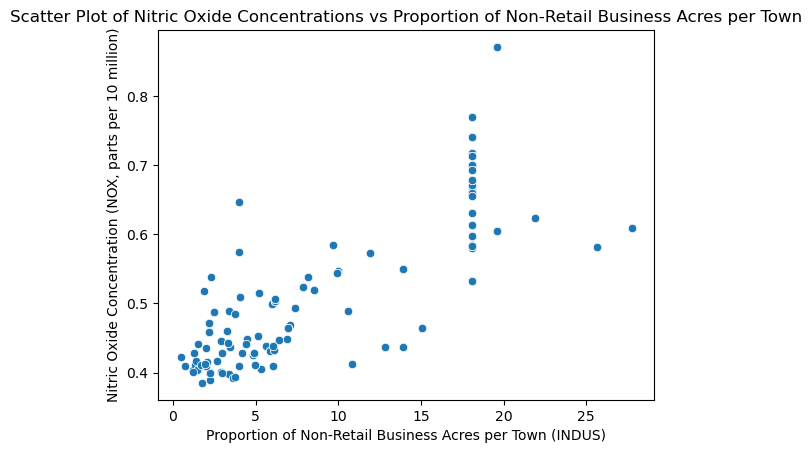

In [3]:
#3. Pearson Correlation: Can we conclude that there is no relationship between Nitric oxide concentrations 
#and the proportion of non-retail business acres per town?
# Null and Alternative Hypotheses
# H0: There is no significant linear relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).
# H1: There is a significant linear relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).

# Pearson Correlation for NOX and INDUS
corr, p_value = stats.pearsonr(df['NOX'], df['INDUS'])
print(f"Pearson Correlation Results: correlation = {corr:.4f}, p-value = {p_value:.4f}")

# Conclusion
if p_value < 0.05:
    print("Conclusion: There is a significant correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town.")
else:
    print("Conclusion: There is no significant correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town.")

# Scatter plot to visualize the relationship
sns.scatterplot(x='INDUS', y='NOX', data=df)
plt.title('Scatter Plot of Nitric Oxide Concentrations vs Proportion of Non-Retail Business Acres per Town')
plt.xlabel('Proportion of Non-Retail Business Acres per Town (INDUS)')
plt.ylabel('Nitric Oxide Concentration (NOX, parts per 10 million)')
plt.show()

# Explanation:
# The scatter plot helps visualize the relationship between industrial land use (INDUS) and pollution levels (NOX).
# If the points on the plot show a pattern, such as a line, it suggests a relationship between the two variables.
# The Pearson correlation quantifies this relationship, showing whether it is statistically significant and whether it is positive or negative.


In [ ]:
# Null and Alternative Hypotheses
# H0: There is no significant linear relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).
# H1: There is a significant linear relationship between Nitric oxide concentrations (NOX) and the proportion of non-r
#Conclusion:Pearson Correlation Results: correlation = 0.7637, p-value = 0.0000
Conclusion: There is a significant correlation between Nitric oxide concentrations and the proportion of non-retail
business acres per town.

In [ ]:
EXPLANATION of SCATTER PLOT:
This scatter plot shows the relationship between Nitric Oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS). 
The plot reveals a positive linear relationship, where higher proportions of industrial land (INDUS) are generally associated with higher NOX levels.
The Pearson correlation coefficient of 0.7637, with a p-value of 0.0000, confirms that this relationship is strong and statistically significant. 
This suggests that areas with more industrial land tend to have higher levels of air pollution.

In [4]:
# Null and Alternative Hypotheses
# H0: The weighted distance to the five Boston employment centers (DIS) has no significant impact on the median value of owner-occupied homes (MEDV).
# H1: The weighted distance to the five Boston employment centers (DIS) has a significant impact on the median value of owner-occupied homes (MEDV).

# Linear Regression for DIS and MEDV
X = sm.add_constant(df['DIS'])  # Adding a constant for the intercept
model = sm.OLS(df['MEDV'], X).fit()
print(model.summary())

# Extract the coefficient and p-value for the DIS variable
coef_DIS = model.params['DIS']
p_value_DIS = model.pvalues['DIS']

# Conclusion and Interpretation
if p_value_DIS < 0.05:
    print(f"Conclusion: The weighted distance to the five Boston employment centers has a significant impact on the median value of owner-occupied homes. "
          f"The coefficient is {coef_DIS:.4f}, which means that for each additional unit increase in distance, the median home value changes by ${coef_DIS * 1000:.2f}.")
else:
    print("Conclusion: The weighted distance to the five Boston employment centers has no significant impact on the median value of owner-occupied homes.")

# Explanation:
# The regression analysis provides the coefficient for the DIS variable, which tells us how much the median home value (MEDV) changes for each additional unit of distance (DIS).
# A positive coefficient means that as the distance increases, the median value increases, and vice versa for a negative coefficient.
# The p-value helps determine if this relationship is statistically significant.


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 20 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        21:49:48   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

In [ ]:
Conclusion: The weighted distance to the five Boston employment centers has a significant impact on the median value of 
    owner-occupied homes. 
    The coefficient is 1.0916, which means that for each additional unit increase in distance,
    the median home value changes by $1091.61.

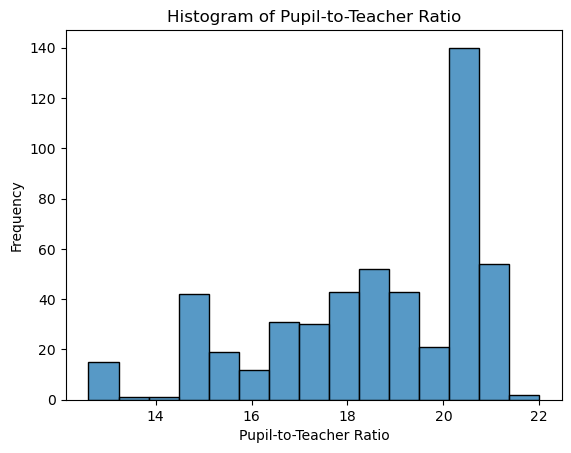

In [5]:
# Histogram for Pupil-to-Teacher Ratio (PTRATIO)
sns.histplot(df['PTRATIO'], bins=15, kde=False)
plt.title('Histogram of Pupil-to-Teacher Ratio')
plt.xlabel('Pupil-to-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()